In [1]:
import tflearn.datasets.oxflower17 as oxflower17

Instructions for updating:
non-resource variables are not supported in the long term
curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [2]:
X, Y = oxflower17.load_data()

print(X.shape)
print(Y.shape)

(1360, 224, 224, 3)
(1360,)


Width and height 224

In [3]:
import numpy as np
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

* Total 17 different Classes of flowers are present.

Text(0.5, 1.0, 'Label: 12')

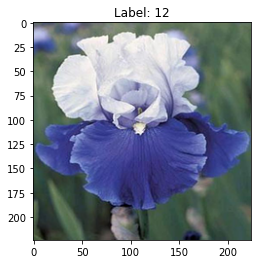

In [4]:
#Visualizing
import matplotlib.pyplot as plt

plt.imshow(X[100,:,:,:])
plt.title('Label: '+str(Y[100]))

In [5]:
# Converting target into one hot encoded variable.
from sklearn.preprocessing import OneHotEncoder

Y = Y.reshape(-1, 1)
encoder = OneHotEncoder(sparse=False)
y_encoded = encoder.fit_transform(Y)
print(y_encoded)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [6]:
print(y_encoded.shape)

(1360, 17)


In [7]:
# Applying different filters.

import cv2
import numpy as np

img = X[100,:,:,:]

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9
edgeDetectionKernel1 = np.array(([[-1,0,1],[-2,0,2],[-1,0,1]]))
edgeDetectionKernel2 = np.array(([[-1,-2,-1],[0,0,0],[1,2,1]]))

gaussianBlur = cv2.filter2D(src=img, kernel=gaussianBlurKernel, ddepth=-1)
meanBlur = cv2.filter2D(src=img, kernel=meanBlurKernel, ddepth=-1)
sharpen = cv2.filter2D(src=img, kernel=sharpenKernel, ddepth=-1)
edge1 = cv2.filter2D(src=gray,kernel=edgeDetectionKernel1, ddepth=-1)
edge2 = cv2.filter2D(src=gray,kernel=edgeDetectionKernel2, ddepth=-1)

* Guassian Blur

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Guassian Blurred Image')

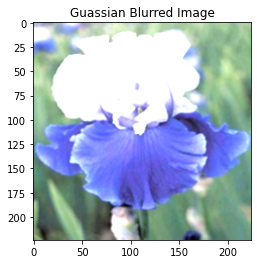

In [8]:
plt.imshow(gaussianBlur)
plt.title('Guassian Blurred Image')

* Mean Blur 

Text(0.5, 1.0, 'Mean Blurred Image')

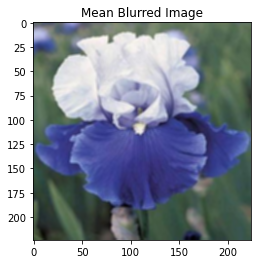

In [9]:
meanBlur.shape
plt.imshow(meanBlur)
plt.title('Mean Blurred Image')

* Sharpen Image.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Sharpened Image')

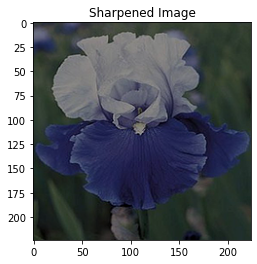

In [10]:
plt.imshow(sharpen)
plt.title('Sharpened Image')

* Gray Scale Of both horizontal and vertical edges.

Text(0.5, 1.0, 'Horizontal Edges shown in gray scale')

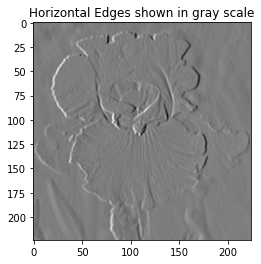

In [11]:
plt.imshow(edge1,cmap='gray')
plt.title('Horizontal Edges shown in gray scale')

Text(0.5, 1.0, 'Vertical Edges shown in gray scale only')

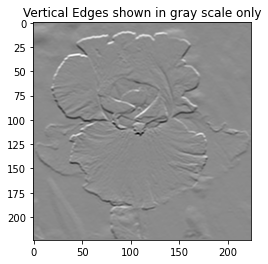

In [12]:
plt.imshow(edge2,cmap='gray')
plt.title('Vertical Edges shown in gray scale only')

### SVM Model

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,shuffle = True)

In [14]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1088, 224, 224, 3)
(272, 224, 224, 3)
(1088, 1)
(272, 1)


In [15]:
x_train1=[]
for i in range(len(x_train)):
    x_train1.append(x_train[i].flatten())
    
x_train1 = np.array(x_train1)


y_train1=[]
for i in range(len(y_train)):
    y_train1.append(y_train[i].flatten())
    
y_train1 = np.array(y_train1)

In [16]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(x_train1)
xpca = pca.transform(x_train1)

In [17]:
from sklearn import svm

clf = svm.SVC(gamma=0.025, C=3) 

clf.fit(xpca , y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=3, gamma=0.025)

In [18]:
x_test1=[]
for i in range(len(x_test)):
    x_test1.append(x_test[i].flatten())
    
x_test1 = np.array(x_test1)
xpcatest = pca.transform(x_test1)

y_pred = clf.predict(xpcatest)

from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.1323529411764706


### Neural Network Model

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2,shuffle = True)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers,optimizers

classifier_17f = Sequential()
classifier_17f.add(Flatten())
classifier_17f.add(Dense(units=2048,activation='relu'))
classifier_17f.add(Dense(units=1024,activation='relu'))
classifier_17f.add(Dense(units=1024,activation='relu'))
classifier_17f.add(Dense(256,activation='relu'))
classifier_17f.add(Dense(128,activation='relu'))
classifier_17f.add(Dense(units=64,activation='relu'))
classifier_17f.add(Dense(units=17,activation='softmax'))

sgd =optimizers.Adam()
classifier_17f.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])

In [21]:
#Saving the best model using model checkpoint callback
import tensorflow
model_checkpoint=tensorflow.keras.callbacks.ModelCheckpoint('17flowers_nn.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
img_gen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

In [ ]:
# history5 = classifier_17f.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),steps_per_epoch=int(len(X_train)/16),epochs=40,validation_data=(X_test,y_test),callbacks=[model_checkpoint])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/40
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 16.9184 - acc: 0.0542WARNING:tensorflow:From C:\Anaconda\lib\site-packages\tensorflow\python\keras\engine\training_v1.py:2048: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.

Epoch 00001: val_acc improved from -inf to 0.06985, saving model to 17flowers_nn.h5


* My Computer couldnt handle the ram usage of NN Model.

### CNN Model

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Conv2D(96, kernel_size=(11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(384, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(17, activation='softmax'))

In [25]:
model.compile(optimizer=Adam(),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [26]:
y_train.shape

(1088, 17)

In [27]:
model_checkpoint2=tensorflow.keras.callbacks.ModelCheckpoint('17flowers.h5', #where to save the model
                                                    save_best_only=True, 
                                                    monitor='val_acc', 
                                                    mode='max', 
                                                    verbose = 1)

In [29]:
history4 = model.fit_generator(img_gen.flow(X_train*255, y_train, batch_size = 16),steps_per_epoch=int(len(X_train)/16),epochs=40,validation_data=(X_test,y_test),callbacks=[model_checkpoint2])

Epoch 1/40
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 3.3563 - acc: 0.1985
Epoch 00001: val_acc improved from -inf to 0.08088, saving model to 17flowers.h5
68/68 [==============================] - 46s 673ms/step - batch: 33.5000 - size: 16.0000 - loss: 3.3563 - acc: 0.1985 - val_loss: 7.7287 - val_acc: 0.0809
Epoch 2/40
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.3735 - acc: 0.2610
Epoch 00002: val_acc improved from 0.08088 to 0.19485, saving model to 17flowers.h5
68/68 [==============================] - 42s 619ms/step - batch: 33.5000 - size: 16.0000 - loss: 2.3735 - acc: 0.2610 - val_loss: 2.2613 - val_acc: 0.1949
Epoch 3/40
68/68 [==============================] - ETA: 0s - batch: 33.5000 - size: 16.0000 - loss: 2.0137 - acc: 0.3143
Epoch 00003: val_acc improved from 0.19485 to 0.29044, saving model to 17flowers.h5
68/68 [==============================] - 42s 616ms/step - batch: 33.5000 - 

* CNN automatically detects the required features on itw own.
* CNN is better than NN cause CNN has features like parameter sharing and dimensionality reduction.
* ML Algorithms requires some human intervention.

### GUI

In [30]:
import tkinter as tk
from tkinter import ttk
import re
from tkinter import filedialog
import cv2
import numpy as np
win = tk.Tk()
win.title(' Classifier-Convolutional Neural Networks GUI')
Name = ttk.Label(win,text="Step 1: File Name",width=25)
Name.grid(row=0,column=0,sticky=tk.W)
Name_var = tk.StringVar()
Name_entrybox = ttk.Entry(win,width=16,textvariable=Name_var)
Name_entrybox.grid(row=0,column=1)
def browsefunc():
    filename = filedialog.askopenfilename()
    print(filename)
    Name_var.set(filename)
def predictfunc():
    test_image = cv2.imread(Name_var.get())
    test_image = cv2.resize(test_image,(224,224))
    import numpy as np
    test_image = np.expand_dims(test_image,axis=0)
    test_image = test_image
    pre_trained_model2 = tensorflow.keras.models.load_model('17flowers.h5')
    result = pre_trained_model2.predict(test_image)
    predicted_index = np.argmax(result[0])
    print(predicted_index)
    print(result)
    
    
    confirm_entrybox = ttk.Entry(win,width=16)
    confirm_entrybox.grid(row=3,column=1,sticky=tk.W)
    confirm_entrybox.insert(1,str(predicted_index))

    
browsebutton = ttk.Button(win, text="Browse", command=browsefunc)
browsebutton.grid(row=0,column=2)
CNN = ttk.Label(win,text="Classifier-CNN",width=25)
CNN.grid(row=1,column=0,sticky=tk.W)
predictbutton = ttk.Button(win, text="Predict", command=predictfunc)
predictbutton.grid(row=2,column=1)
Result = ttk.Label(win,text="Predicted Class",width=25)
Result.grid(row=3,column=0)
win.mainloop()